# <span style="color:blue"> NSL Exercise lesson 6. </span> 

## <span style="color:red"> Exercise 6.1. </span>

The aim of this lesson is simulating the one-dimensional Ising Model. In particular we want to simulate a system of $N=50$ spins interacting only with nearest neighbors, considering also the necessary periodic boundary conditions. Mathematically, the hamiltonian describing such system is 

$$
H = -J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where it is assumed that $\mu_{b}$ (Bohr magneton) and $k_b$ (Boltzmann constant) are both equal to $1$.

In order to perform such simulation, the C++ Ising code was completed implementing Metropolis and Gibbs sampling algorithm. Also, it was added the possibility to restart from a previous spin configuration of the system.

In particular, it was requested to make an estimation of the following thermodynamical variables of our system:

- internal energy $U(N,T)$;
- heat capacity $C(N,T)$;
- magnetization $M(N,T,h=0.02)$;
- magnetic susceptibility $\chi(N,T)$;

All these quantities were computed as a function of temperature in the range $[0.5;2.0]K$.

All the simulations were carried out using $100$ blocks and $10^4$ steps in each block. No preliminary equilibration was actually performed (using both Metropolis and Gibbs algorithm), since as you can see in the plot below (or in the data file <font face="Courier">sampled_values.dat</font>) less than ten steps out of $10^4$ are needed to reach a neighborhood of the expected values at most.

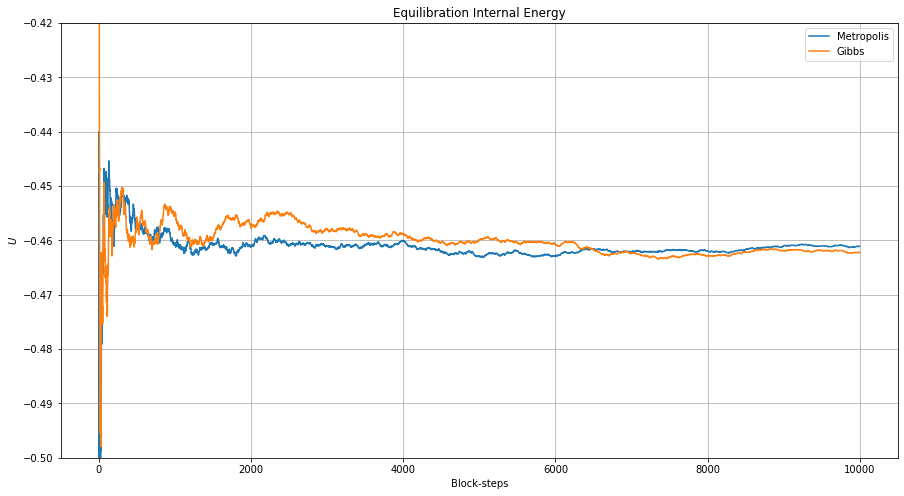

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15, 8))

far_1s = np.loadtxt("Datas/sampled_values.dat", max_rows=10000)
far_2p = np.loadtxt("Datas/sampled_values.dat", skiprows=10000)

plt.title("Equilibration Internal Energy")
plt.xlabel('Block-steps')
plt.ylabel('$U$')
plt.ylim([-0.5, -0.42]) 
plt.plot(far_1s, label="Metropolis")
plt.plot(far_2p, label="Gibbs")
plt.grid(True)
plt.legend()

plt.show()

The following code loads all data needed to draw the required plots, which are compared to the theoretical trends of the thermodynamical quantities. All results are showed in units of $\mu_{b}$ and $k_b$.

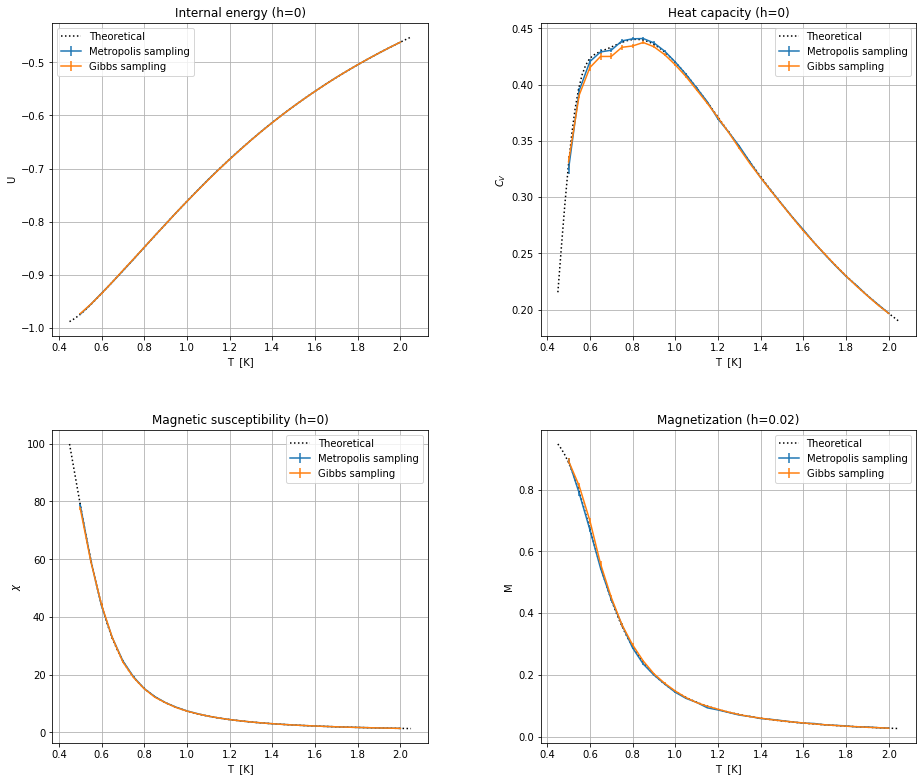

In [2]:
#Theoretical trends

points=100
T = np.linspace(0.45,2.05,num=points)
beta = 1/T
J = 1.0
Ns = 50       #Number of spins
h=0.02        #External field
b = 1/T

th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

#Internal energy
U = -J*( th + ch*thN )/( 1 + thN )

#Heat capacity
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#Magnetic susceptibility
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#Magnetization
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#Simulated Trends

#Internal energy
temp, M_ene, M_ene_err = np.loadtxt("Datas/m_ene.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
G_ene , G_ene_err = np.loadtxt("Datas/g_ene.dat", usecols=(1,2), delimiter=' ', unpack='true')

plt.subplot(2,2,1)
plt.errorbar(temp, M_ene, M_ene_err, label = "Metropolis sampling")
plt.errorbar(temp, G_ene, G_ene_err, label = "Gibbs sampling")
plt.plot(T, U, label="Theoretical", color='k', linestyle="dotted")
plt.title('Internal energy (h=0)')
plt.xlabel('T  [K]')
plt.ylabel('U')
plt.grid(True)
plt.legend()

#Heat capacity
M_heat, M_heat_err = np.loadtxt("Datas/m_heat.dat", usecols=(1,2), delimiter=' ', unpack='true')
G_heat, G_heat_err = np.loadtxt("Datas/g_heat.dat", usecols=(1,2), delimiter=' ', unpack='true')

plt.subplot(2,2,2)
plt.errorbar(temp, M_heat, M_heat_err, label = "Metropolis sampling")
plt.errorbar(temp, G_heat, G_heat_err, label = "Gibbs sampling")
plt.plot(T, heat, label="Theoretical", color='k', linestyle="dotted")
plt.title('Heat capacity (h=0)')
plt.xlabel('T  [K]')
plt.ylabel('$C_{V}$')
plt.grid(True)
plt.legend()

#Magnetic susceptibility 
M_X, M_X_err = np.loadtxt("Datas/m_chi.dat", usecols=(1,2), delimiter=' ', unpack='true')
G_X, G_X_err = np.loadtxt("Datas/g_chi.dat", usecols=(1,2), delimiter=' ', unpack='true')

plt.subplot(2,2,3)
plt.errorbar(temp, M_X, M_X_err, label = "Metropolis sampling")
plt.errorbar(temp, G_X, G_X_err, label = "Gibbs sampling")
plt.plot(T, X, label="Theoretical", color='k', linestyle="dotted")
plt.title('Magnetic susceptibility (h=0)')
plt.xlabel('T  [K]')
plt.ylabel('$\chi$')
plt.grid(True)
plt.legend()

#Magnetization
M_m, M_m_err = np.loadtxt("Datas/m_mag.dat", usecols=(1,2), delimiter=' ', unpack='true')
G_m, G_m_err = np.loadtxt("Datas/g_mag.dat", usecols=(1,2), delimiter=' ', unpack='true')

plt.subplot(2,2,4)
plt.errorbar(temp, M_m, M_m_err, label = "Metropolis sampling")
plt.errorbar(temp, G_m, G_m_err, label = "Gibbs sampling")
plt.plot(T, M, label="Theoretical", color='k', linestyle="dotted")
plt.title('Magnetization (h=0.02)')
plt.xlabel('T  [K]')
plt.ylabel('M')
plt.grid(True)
plt.legend()

plt.subplots_adjust(left=-0.5, bottom=-0.5, right=1.5, top=2, wspace=0.3, hspace=0.3) 

plt.show()

From the plots above we can safely say that both Metropolis and Gibbs algorithm converges to the expected trends within one standard deviation (the only exception is Gibbs heat capacity simulation in the range $[0.6,0.9]K$ where the results are in agreement with the theoretical trend within $2\sigma$).